#  Reading Data

## Imports

In [1]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
from tensorflow.keras.applications import xception
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


## The read function:
*  read a whole folder of images
*  Make data augmentation by flipping the image 3 times

In [2]:
def read_imgs_folder(folder):
    X = []
    Y = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        _, buffer = cv2.imencode(".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 90])
        compressed_img = cv2.imdecode(np.frombuffer(buffer, np.uint8), cv2.IMREAD_COLOR)
        img = 15 * cv2.absdiff(img, compressed_img)
        img = cv2.resize(img , (100,100) , interpolation= cv2.INTER_AREA)
#         img = img/255
        if img is not None:
            X.append(img)
            if os.path.split(folder)[-1]=='Au':
                Y.append(1)
            else:
                Y.append(0)
            X.append(np.flip(img))
            if os.path.split(folder)[-1]=='Au':
                Y.append(1)
            else:
                Y.append(0)
            X.append(np.flipud(img))
            if os.path.split(folder)[-1]=='Au':
                Y.append(1)
            else:
                Y.append(0)
            X.append(np.fliplr(img))
            if os.path.split(folder)[-1]=='Au':
                Y.append(1)
            else:
                Y.append(0)
    return X ,Y

### Read the real images and plot a sample

In [3]:
x1,y1 = read_imgs_folder('D:\projs\programing\ML\Python\Fake image detector\Data\Au')


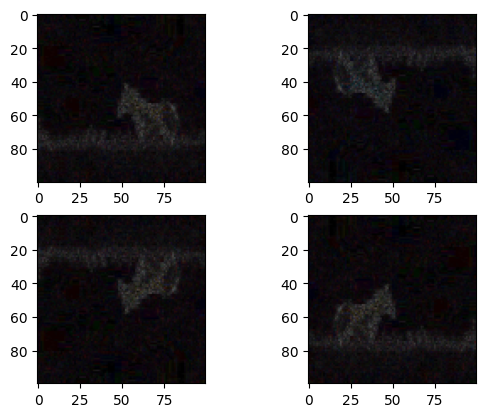

In [4]:
fig, axes = plt.subplots(2,2)
axes[0,0].imshow(x1[0])
axes[0,1].imshow(x1[1])
axes[1,0].imshow(x1[2])
axes[1,1].imshow(x1[3])

### Read the fake images and plot a sample

In [5]:
x2,y2 = read_imgs_folder('D:\projs\programing\ML\Python\Fake image detector\Data\Tp')

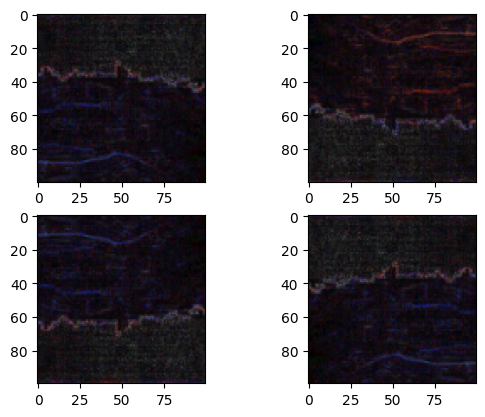

In [6]:
fig, axes = plt.subplots(2,2)
axes[0,0].imshow(x2[0])
axes[0,1].imshow(x2[1])
axes[1,0].imshow(x2[2])
axes[1,1].imshow(x2[3])

## Save the data locally

In [7]:
X = np.array(x1+x2)

In [8]:
Y = np.array(y1+y2)

In [9]:
np.save('Xdata' , X)

In [10]:
np.save('Ydata' , Y)